# EV Demand Prediction Engine
## Demand Forecasting & Analytics Dashboard

This notebook runs the end-to-end pipeline:
1. **Data Generation**: Creates synthetic charging session data.
2. **Feature Engineering**: Prepares data with lags, rolling means, and temporal features.
3. **Model Training**: Trains an Ensemble of Prophet, LSTM, and XGBoost.
4. **Forecasting**: Predicts demand for the next 7 days.
5. **Analytics**: Generates key insights, peak detection, and recommendations.

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
from demand_prediction_engine import DataGenerator, FeatureEngineer, EnsembleForecaster, AnalyticsReporter

sns.set(style="whitegrid")

### 1. Data Generation & Processing

In [3]:
print("Generating Synthetic Data...")
gen = DataGenerator(days=90)
raw_df = gen.generate()

print("Feature Engineering...")
fe = FeatureEngineer()
df_model, df_full, _ = fe.process(raw_df)

print(f"Data Ready. Records: {len(df_model)}")
raw_df.head()

Generating Synthetic Data...
Feature Engineering...
Data Ready. Records: 2136


,timestamp,station_id,vehicle_count,session_count,occupancy_rate,queue_length
0,2025-09-12 20:06:30.932487,S01,1,1,0.1,0
1,2025-09-12 20:06:30.932487,S02,1,0,0.1,0
2,2025-09-12 20:06:30.932487,S03,1,1,0.1,0
3,2025-09-12 20:06:30.932487,S04,2,1,0.2,0
4,2025-09-12 20:06:30.932487,S05,1,0,0.1,0


### 2. Model Training (Ensemble)

In [4]:
ensemble = EnsembleForecaster(df_model, df_full)
ensemble.train()

   - Training Prophet...
   - Training XGBoost...
   - Training LSTM...


### 3. Forecasting & Visualization

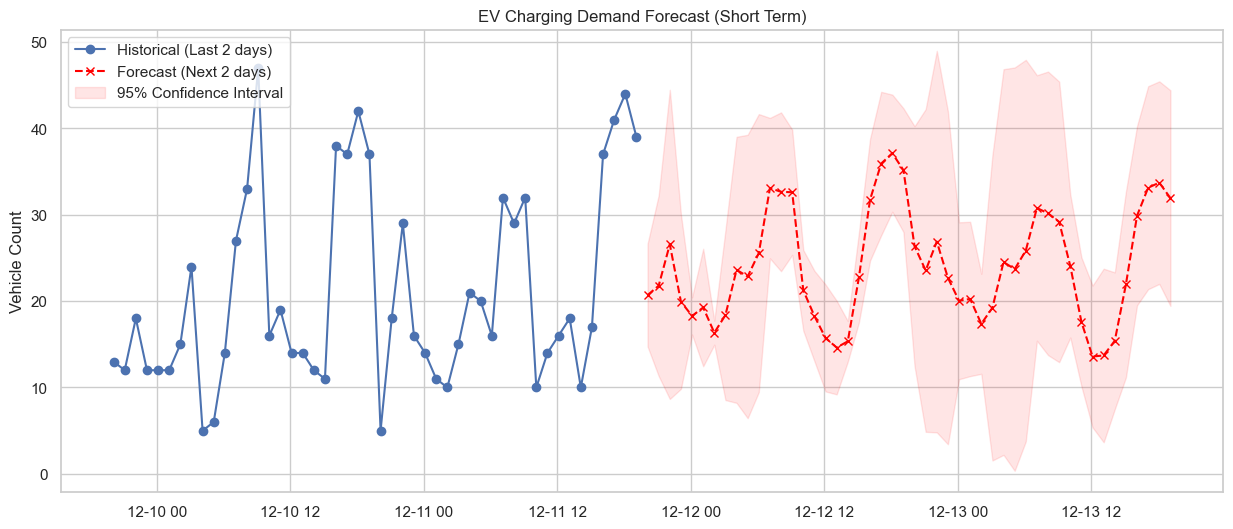

In [5]:
forecast_results = ensemble.forecast(hours=24 * 7)

# Visualization
plt.figure(figsize=(15, 6))
plt.plot(df_full['timestamp'].tail(48), df_full['vehicle_count'].tail(48), label='Historical (Last 2 days)', marker='o')
plt.plot(forecast_results['timestamp'][:48], forecast_results['ensemble'][:48], label='Forecast (Next 2 days)', linestyle='--', marker='x', color='red')
plt.fill_between(forecast_results['timestamp'][:48], 
                 forecast_results['lower'][:48], 
                 forecast_results['upper'][:48], color='red', alpha=0.1, label='95% Confidence Interval')
plt.title("EV Charging Demand Forecast (Short Term)")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()

### 4. Analytics Report

In [6]:
reporter = AnalyticsReporter(raw_df, forecast_results)
report = reporter.generate_report()

print(json.dumps(report, indent=2))

{
  "forecast_24h": [
    20.7,
    21.8,
    26.6,
    19.9,
    18.3,
    19.3,
    16.3,
    18.4,
    23.6,
    22.9,
    25.6,
    33.1,
    32.7,
    32.6,
    21.2,
    18.3,
    15.7,
    14.6,
    15.3,
    22.8,
    31.7,
    35.9,
    37.1,
    35.2
  ],
  "forecast_7d": [
    20.7,
    21.8,
    26.6,
    19.9,
    18.3,
    19.3,
    16.3,
    18.4,
    23.6,
    22.9,
    25.6,
    33.1,
    32.7,
    32.6,
    21.2,
    18.3,
    15.7,
    14.6,
    15.3,
    22.8,
    31.7,
    35.9,
    37.1,
    35.2,
    26.4,
    23.6,
    26.9,
    22.7,
    20.0,
    20.3,
    17.4,
    19.2,
    24.5,
    23.7,
    25.9,
    30.8,
    30.2,
    29.2,
    24.1,
    17.6,
    13.6,
    13.7,
    15.4,
    21.9,
    29.9,
    33.1,
    33.7,
    31.9,
    24.8,
    22.4,
    25.0,
    21.9,
    20.9,
    19.8,
    17.6,
    19.0,
    23.2,
    22.4,
    25.2,
    30.2,
    28.7,
    28.3,
    26.1,
    19.1,
    14.4,
    13.9,
    15.9,
    23.0,
    30.4,
    33.8,
    34.5,
    3